In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
twitter_data = pd.read_csv("tweet-replies/bbudka-replies-full.csv")

In [12]:
twitter_data.head()

,tweet,tweet translated,sentiment
0,Pięknie pan mówi. W stylu Gebbelsa 😂,You speak beautifully. In the style of gebbels 😂,negative
1,ciamajdan w Warszawie,Ciamajdan in Warsaw,negative
2,Gomułka junior zamknij się,Gomułka Junior Shut up,negative
3,To wy Budka mówicie że będziecie siłą wyprowad...,You say that you say that you will force peopl...,negative
4,"Albo Polin, albo Putin - innego wyboru nie ma.",Either Polin or Putin - there is no other choice.,negative


In [25]:
def format_output(output_dict):
  polarity = "neutral"
  if(output_dict['compound']>= 0.05):
    polarity = "positive"
  elif(output_dict['compound']<= -0.05):
    polarity = "negative"
  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

twitter_data["vader_prediction"] = twitter_data["tweet translated"].apply(predict_sentiment)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(twitter_data['sentiment'], twitter_data['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(twitter_data['sentiment'], twitter_data['vader_prediction']))

Accuracy: 0.36823104693140796

              precision    recall  f1-score   support

    negative       0.89      0.38      0.53       714
     neutral       0.08      0.35      0.13        66
    positive       0.06      0.29      0.10        51

    accuracy                           0.37       831
   macro avg       0.34      0.34      0.25       831
weighted avg       0.78      0.37      0.47       831



[[268 249 197]
 [ 18  23  25]
 [ 14  22  15]]


C:\Users\janka\AppData\Local\Temp/ipykernel_3952/563852666.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\janka\AppData\Local\Temp/ipykernel_3952/563852666.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


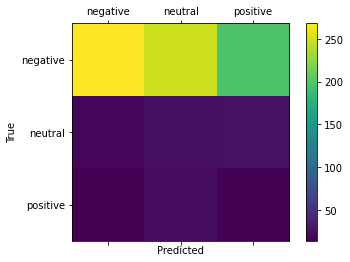

In [31]:
import matplotlib.pyplot as plt
std = confusion_matrix(twitter_data['sentiment'], twitter_data['vader_prediction'])
print(std)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(std)
fig.colorbar(cax)
labels = ['negative', 'neutral', 'positive']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()